In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from numpy.random import uniform
import math
import matplotlib.pyplot as plt
import os
%matplotlib inline


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diploma/Epileptic Seizure Recognition.csv')
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


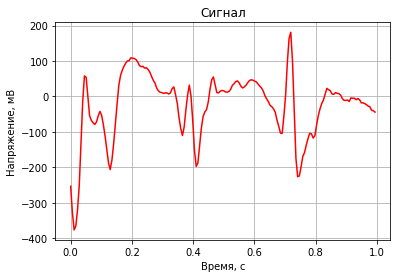

In [4]:
FD = 178 # частота дискретизации, отсчётов в секунду
N = 178 # длина входного массива, 0.091 секунд при такой частоте дискретизации
pure_sig = data.values[141][1:-1]
spectrum = rfft(pure_sig)
time_range = arange(N)/float(FD)

plt.plot(time_range, pure_sig, 'r')
plt.xlabel(u'Время, c')
plt.ylabel(u'Напряжение, мВ')
plt.title(u'Сигнал')
plt.grid(True)
plt.show()

In [5]:
def find_oscillations(data):
    oscillations = []
    up = data[0] < data[1]
    if data[0] > data[1]:
        counter = 2
        peak = [data[0], time_range[0]]
        prev = [data[1], time_range[1]]
        first = [data[0], time_range[0]]
    else:
        counter = 1
        peak = 0
        first = [data[0], time_range[0]]
        prev = [data[0], time_range[0]]
        second = 0
    dots = 0
    temp = []
    for i, time in zip(range(1, len(data)), time_range):
        new_up = False
        if prev[0] < data[i]:
            new_up = True
        if not up == new_up:
            if counter == 0:
                first = prev
                counter += 1
            elif counter == 1:
                if first < prev:
                    peak = prev
                    counter += 1
                else:
                    first = prev
            elif counter == 2:
                second = prev
                counter = 1
                oscillations.append(
                {
                    "first": first,
                    "peak": peak,
                    "second": second
                }
                )
                first = prev
                peak = 0
                second = 0
            up = not up
        prev = [data[i], time]
    return oscillations

oscillations = find_oscillations(pure_sig)
print(oscillations)

[{'first': [-253, 0.0], 'peak': [-253, 0.0], 'second': [-376, 0.0056179775280898875]}, {'first': [-376, 0.0056179775280898875], 'peak': [58, 0.03932584269662921], 'second': [-79, 0.07303370786516854]}, {'first': [-79, 0.07303370786516854], 'peak': [-42, 0.0898876404494382], 'second': [-206, 0.12359550561797752]}, {'first': [-206, 0.12359550561797752], 'peak': [109, 0.19101123595505617], 'second': [84, 0.2247191011235955]}, {'first': [84, 0.2247191011235955], 'peak': [85, 0.2303370786516854], 'second': [80, 0.23595505617977527]}, {'first': [80, 0.23595505617977527], 'peak': [81, 0.24157303370786518], 'second': [9, 0.29775280898876405]}, {'first': [9, 0.29775280898876405], 'peak': [10, 0.30337078651685395], 'second': [7, 0.3146067415730337]}, {'first': [7, 0.3146067415730337], 'peak': [27, 0.33146067415730335], 'second': [-110, 0.3595505617977528]}, {'first': [-110, 0.3595505617977528], 'peak': [32, 0.38202247191011235], 'second': [-197, 0.4044943820224719]}, {'first': [-197, 0.404494382

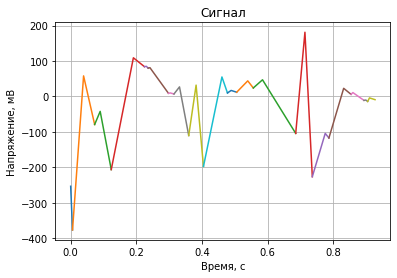

In [6]:
plt.xlabel(u'Время, c')
plt.ylabel(u'Напряжение, мВ')
plt.title(u'Сигнал')
for idx, arr in enumerate(oscillations):
    x = [arr["first"][1], arr["peak"][1], arr["second"][1]]
    y = [arr["first"][0], arr["peak"][0], arr["second"][0]]
    plt.plot(x, y)
plt.grid(True)
plt.show()

In [7]:
def filter_oscillations(osc, filter):
    i = 0
    length = len(osc)
    while not i == length:
        if (not i == 0) and abs(osc[i]["peak"][0] - osc[i]["first"][0]) < filter:
            osc[i - 1]["second"] = osc[i]["second"]
            osc.pop(i)
            length -= 1
        elif (not i == length - 1) and abs(osc[i]["peak"][0] - osc[i]["second"][0]) < filter:
            osc[i]["peak"] = osc[i + 1]["peak"]
            osc[i]["second"] = osc[i + 1]["second"]
            osc.pop(i + 1)
            length -= 1 
            i += 1
        else:
            i += 1

filter_oscillations(oscillations, 25)
print(len(oscillations))

9


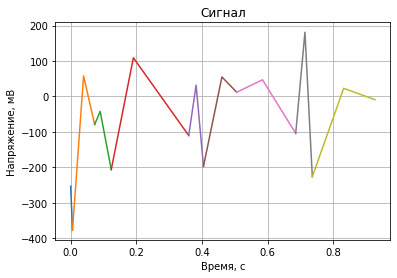

[{'first': [-253, 0.0], 'peak': [-253, 0.0], 'second': [-376, 0.0056179775280898875]}, {'first': [-376, 0.0056179775280898875], 'peak': [58, 0.03932584269662921], 'second': [-79, 0.07303370786516854]}, {'first': [-79, 0.07303370786516854], 'peak': [-42, 0.0898876404494382], 'second': [-206, 0.12359550561797752]}, {'first': [-206, 0.12359550561797752], 'peak': [109, 0.19101123595505617], 'second': [-110, 0.3595505617977528]}, {'first': [-110, 0.3595505617977528], 'peak': [32, 0.38202247191011235], 'second': [-197, 0.4044943820224719]}, {'first': [-197, 0.4044943820224719], 'peak': [55, 0.4606741573033708], 'second': [12, 0.5056179775280899]}, {'first': [12, 0.5056179775280899], 'peak': [47, 0.5842696629213483], 'second': [-104, 0.6853932584269663]}, {'first': [-104, 0.6853932584269663], 'peak': [181, 0.7134831460674157], 'second': [-226, 0.7359550561797753]}, {'first': [-226, 0.7359550561797753], 'peak': [23, 0.8314606741573034], 'second': [-9, 0.9269662921348315]}]


In [8]:
plt.xlabel(u'Время, c')
plt.ylabel(u'Напряжение, мВ')
plt.title(u'Сигнал')
for idx, arr in enumerate(oscillations):
    x = [arr["first"][1], arr["peak"][1], arr["second"][1]]
    y = [arr["first"][0], arr["peak"][0], arr["second"][0]]
    plt.plot(x, y)
plt.grid(True)
plt.show()
print(oscillations)

In [9]:
def get_time(wave):
    return (wave["second"][1] - wave["first"][1]) * 1000

def get_len(wave):
    return (wave["peak"][0] - max(wave["first"][0], wave["second"][0]))

In [10]:
def get_width_and_height(osc):
    data = []
    for i in range(len(osc)):
        item = {}
        width = math.ceil(get_time(osc[i]))
        height = get_len(osc[i])
        item["width"] = width
        item["height"] = height
        data.append(item)
    return data

res = get_width_and_height(oscillations)
print("widths_and_heights", res)

widths_and_heights [{'width': 6, 'height': 0}, {'width': 68, 'height': 137}, {'width': 51, 'height': 37}, {'width': 236, 'height': 219}, {'width': 45, 'height': 142}, {'width': 102, 'height': 43}, {'width': 180, 'height': 35}, {'width': 51, 'height': 285}, {'width': 192, 'height': 32}]


#Новый раздел

In [11]:
def get_epilepsy_data(data):
    arr = []
    for index, elem in enumerate(data.values):
        if elem[-1] == 1:
            arr.append(index)
    return arr

data_with_epilepsy = get_epilepsy_data(data)[:500]
print(len(data_with_epilepsy))

500


In [12]:
def get_width_and_height_of_epilepsy(epilepsy):
    arr = []
    for index in epilepsy:
        pure_sig = data.values[index][1:-1]
        oscillations = find_oscillations(pure_sig)
        filter_oscillations(oscillations, 30)
        arr.append(get_width_and_height(oscillations))
    return arr

w_h_epilepsy = get_width_and_height_of_epilepsy(data_with_epilepsy)

In [13]:
from openpyxl import load_workbook
def read_markup():
    wb = load_workbook('/content/drive/MyDrive/Colab Notebooks/Diploma/Разметка.xlsx')
    sheet = wb.get_sheet_by_name('Лист1')
    arr = []
    for i in range(2, 11, 2):
        for j in range(1, 101):
            arr.append(sheet.cell(row=j, column=i).value)
    return arr

# print(len(read_markup()))
markup = read_markup()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  after removing the cwd from sys.path.


In [14]:
wave_h_min = 30
wave_h_max = 250
wave_w_min = 50
wave_w_max = 500

spike_h_min = 150
spike_h_max = 600
spike_w_min = 50
spike_w_max = 200

learn, test = np.split(w_h_epilepsy, [int(0.7 * len(w_h_epilepsy))])
print(len(learn), len(test))

350 150


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [15]:
def find_pattern(osc, height_min, height_max, wight_min, wight_max):
    if (height_min <= osc['height'] <= height_max) and (wight_min <= osc['width'] <= wight_max):
        return True

def check(s_h_min, s_h_max, s_w_min, s_w_max, w_h_min, w_h_max, w_w_min, w_w_max, data = learn):
    is_false = 0
    for index, elem in enumerate(data):
        has_pattern = False
        has_spike = False
        has_wave = False
        for i in range(0, len(elem) - 1):
            if find_pattern(elem[i],s_h_min, s_h_max, s_w_min, s_w_max) and ((not find_pattern(elem[i-1],s_h_min, s_h_max, s_w_min, s_w_max)) if (not i == 0) else True ):
                has_spike = True
                if find_pattern(elem[i+1],w_h_min, w_h_max, w_w_min, w_w_max):
                    has_wave = True
        has_pattern = has_spike and has_wave
        if (markup[index] == 0 and has_pattern) or (markup[index] == 1 and not has_pattern):
            is_false = is_false + 1
    return (is_false * 100) / len(data)

In [16]:
EPOCH = 1000
delta = 5
print(spike_h_min," ", spike_h_max," ", spike_w_min," ", spike_w_max," ", wave_h_min," ", wave_h_max," ", wave_w_min," ", wave_w_max)

acc = check(spike_h_min, spike_h_max, spike_w_min, spike_w_max, wave_h_min, wave_h_max, wave_w_min, wave_w_max)
prev = 0
for i in range(EPOCH):
    if (acc == prev):
        delta = delta + 1
    else:
        delta = 5

    prev = acc

    if check(spike_h_min + delta, spike_h_max, spike_w_min, spike_w_max, wave_h_min, wave_h_max, wave_w_min, wave_w_max) > acc:
        spike_h_min = spike_h_min + delta
    if check(spike_h_min - delta, spike_h_max, spike_w_min, spike_w_max, wave_h_min, wave_h_max, wave_w_min, wave_w_max) > acc and spike_h_min - delta > 0:
        spike_h_min = spike_h_min - delta
    if check(spike_h_min, spike_h_max + delta, spike_w_min, spike_w_max, wave_h_min, wave_h_max, wave_w_min, wave_w_max) > acc:
        spike_h_max = spike_h_max + delta
    if check(spike_h_min, spike_h_max - delta, spike_w_min, spike_w_max, wave_h_min, wave_h_max, wave_w_min, wave_w_max) > acc and spike_h_max - delta > 0:
        spike_h_max = spike_h_max - delta
    if check(spike_h_min, spike_h_max, spike_w_min + delta, spike_w_max, wave_h_min, wave_h_max, wave_w_min, wave_w_max) > acc:
        spike_w_min = spike_w_min + delta
    if check(spike_h_min, spike_h_max, spike_w_min - delta, spike_w_max, wave_h_min, wave_h_max, wave_w_min, wave_w_max) > acc and spike_w_min - delta > 0:
        spike_w_min = spike_w_min - delta
    if check(spike_h_min, spike_h_max, spike_w_min, spike_w_max + delta, wave_h_min, wave_h_max, wave_w_min, wave_w_max) > acc:
        spike_w_max = spike_w_max + delta
    if check(spike_h_min, spike_h_max, spike_w_min, spike_w_max - delta, wave_h_min, wave_h_max, wave_w_min, wave_w_max) > acc and spike_w_max - delta > 0:
        spike_w_max = spike_w_max - delta
    if check(spike_h_min, spike_h_max, spike_w_min, spike_w_max, wave_h_min + delta, wave_h_max, wave_w_min, wave_w_max) > acc:
        wave_h_min = wave_h_min + delta
    if check(spike_h_min, spike_h_max, spike_w_min, spike_w_max, wave_h_min - delta, wave_h_max, wave_w_min, wave_w_max) > acc and wave_h_min - delta > 0:
        wave_h_min = wave_h_min - delta
    if check(spike_h_min, spike_h_max, spike_w_min, spike_w_max, wave_h_min, wave_h_max + delta, wave_w_min, wave_w_max) > acc:
        wave_h_max = wave_h_max + delta
    if check(spike_h_min, spike_h_max, spike_w_min, spike_w_max, wave_h_min, wave_h_max - delta, wave_w_min, wave_w_max) > acc and wave_h_max - delta > 0:
        wave_h_max = wave_h_max - delta
    if check(spike_h_min, spike_h_max, spike_w_min, spike_w_max, wave_h_min, wave_h_max, wave_w_min + delta, wave_w_max) > acc:
        wave_w_min = wave_w_min + delta
    if check(spike_h_min, spike_h_max, spike_w_min, spike_w_max, wave_h_min, wave_h_max, wave_w_min - delta, wave_w_max) > acc and wave_w_min - delta > 0:
        wave_w_min = wave_w_min - delta
    if check(spike_h_min, spike_h_max, spike_w_min, spike_w_max, wave_h_min, wave_h_max, wave_w_min, wave_w_max + delta) > acc:
        wave_w_max = wave_w_max + delta
    if check(spike_h_min, spike_h_max, spike_w_min, spike_w_max, wave_h_min, wave_h_max, wave_w_min, wave_w_max - delta) > acc and wave_w_max - delta > 0:
        wave_w_max = wave_w_max - delta
    

    acc = check(spike_h_min, spike_h_max, spike_w_min, spike_w_max, wave_h_min, wave_h_max, wave_w_min, wave_w_max)

    print(spike_h_min," ", spike_h_max," ", spike_w_min," ", spike_w_max," ", wave_h_min," ", wave_h_max," ", wave_w_min," ", wave_w_max)

print("acc in test", check(spike_h_min, spike_h_max, spike_w_min, spike_w_max, wave_h_min, wave_h_max, wave_w_min, wave_w_max, test))

150   600   50   200   30   250   50   500
150   600   45   200   25   245   45   500
150   600   40   200   25   245   40   500
150   600   40   205   25   245   35   500
150   600   40   205   25   245   30   500
150   600   40   205   25   245   25   500
150   600   40   205   25   245   25   500
150   600   40   205   25   245   25   500
150   600   40   205   25   245   25   500
142   592   32   205   17   245   25   500
142   592   32   205   17   245   25   500
142   592   32   205   17   245   25   500
142   592   32   205   17   245   25   500
142   592   32   205   17   245   25   500
142   592   32   205   17   245   25   500
142   592   32   205   17   245   25   500
142   592   32   205   17   245   25   500
142   592   32   205   17   245   25   500
142   592   32   205   17   245   25   500
142   592   32   205   17   245   25   500
142   592   32   205   2   245   10   500
142   592   32   210   2   245   10   500
142   592   32   210   2   245   10   500
148   592   32